In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
N_0 = 10
r = 1.5
dt = 0.01
N_f = 100

In [3]:
def predict_solve_f(N_0, r, dt):
    ts = [0]
    t_ = 0
    while t_ < N_f:
        t_ += dt
        ts.append(t_)
    actual_fun = lambda x: np.exp(r*x) * N_0
    actual_values = [actual_fun(t_) for t_ in ts]

    predictions = [N_0]
    for _ in range(len(ts)-1):
        pr = predictions[-1]*(1+r*dt)
        predictions.append(pr)
    
    
    return ts, predictions, actual_values

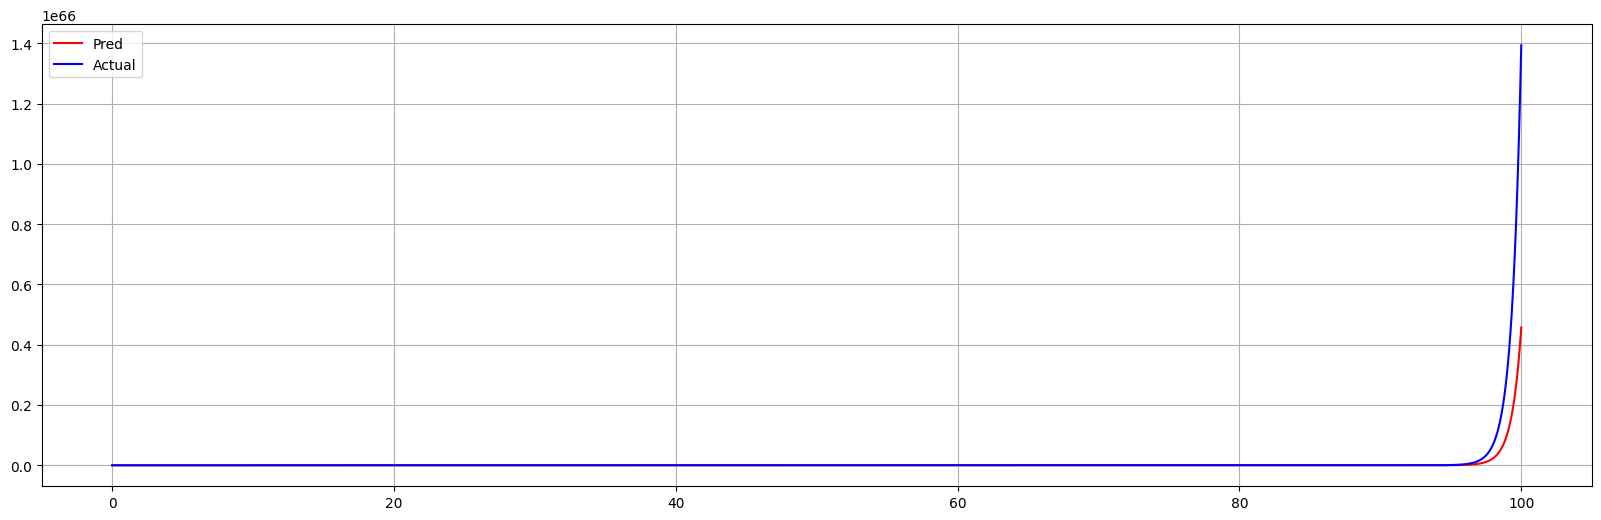

In [4]:
ts, predictions, actual_values = predict_solve_f(N_0, r, 0.01)

fig, axs = plt.subplots(1,1, figsize=(20, 6))

axs.plot(ts, predictions, c='r', label='Pred')
axs.plot(ts, actual_values, c='b', label='Actual')
axs.legend()
axs.grid()
plt.show()

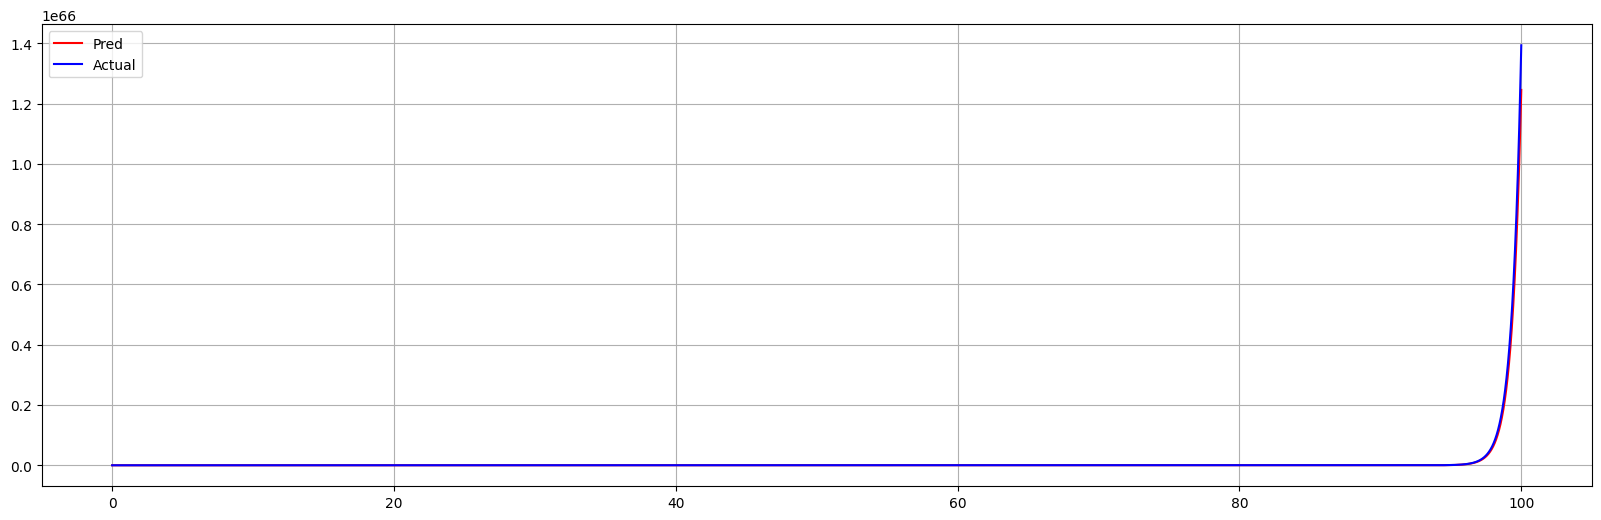

In [5]:
ts, predictions, actual_values = predict_solve_f(N_0, r, 0.001)

fig, axs = plt.subplots(1,1, figsize=(20, 6))

axs.plot(ts, predictions, c='r', label='Pred')
axs.plot(ts, actual_values, c='b', label='Actual')
axs.legend()
axs.grid()
plt.show()

In [6]:
from dhavalgos.odes.euler import forward_euler

In [7]:
def deriv_f(y, t, r = 1.5):
    return r*y

In [8]:
f0 = 10
t0 = 0
tf = 100
time_step = 0.01

ts, ys = forward_euler(deriv_f, f0, t0, tf, time_step)

ts1, ys1 = forward_euler(deriv_f, f0, t0, tf, time_step*0.1)

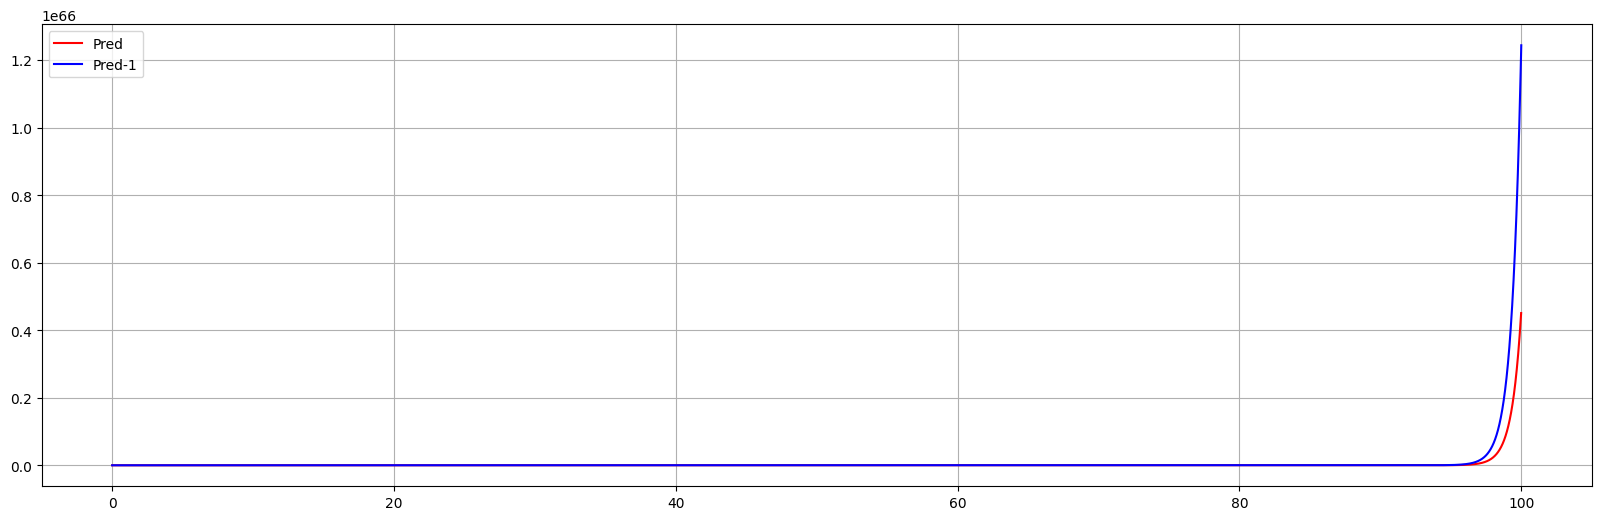

In [9]:
fig, axs = plt.subplots(1,1, figsize=(20, 6))

axs.plot(ts, ys, c='r', label='Pred')
axs.plot(ts1, ys1, c='b', label='Pred-1')
axs.legend()
axs.grid()
plt.show()

In [10]:
f0 = 10
t0 = 0
tf = 100
time_step = 10

def deriv_g(y,t, r = 1.5):
    r = 0.1*(1-y/500.0)
    return r*y

ts, gs = forward_euler(deriv_g, f0, t0, tf, time_step)
ts1, gs1 = forward_euler(deriv_g, f0, t0, tf, time_step*0.5)
ts2, gs2 = forward_euler(deriv_g, f0, t0, tf, time_step*0.1)

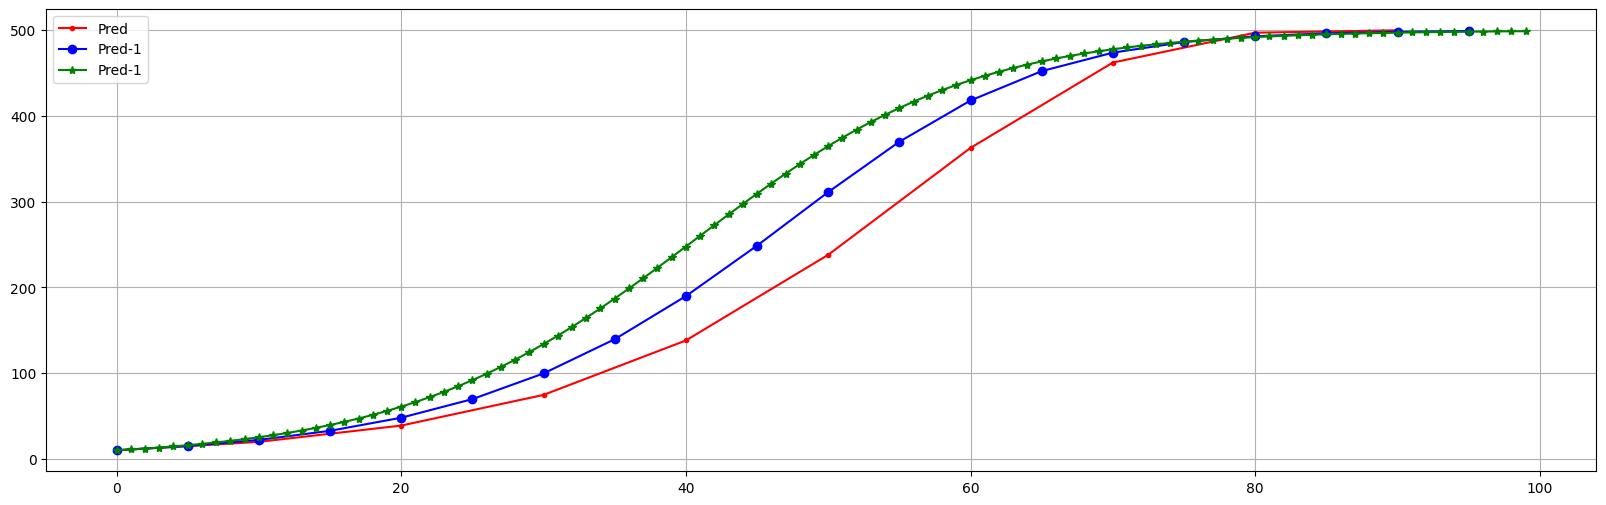

In [11]:
fig, axs = plt.subplots(1,1, figsize=(20, 6))

axs.plot(ts, gs, c='r', label='Pred', marker='.')
axs.plot(ts1, gs1, c='b', label='Pred-1', marker='o')
axs.plot(ts2, gs2, c='g', label='Pred-1', marker='*')
axs.legend()
axs.grid()
plt.show()

In [12]:
forward_euler?

Signature:
forward_euler(
    func: <built-in function callable>,
    y0: float,
    t0: float,
    tf: float,
    time_step: float,
    **kwargs,
) -> tuple
Docstring:
Forward Euler method to solve ODEs

Parameters
----------
    func: callable
        The function tact returns the derivative of y at a given y and t, func(y, t, **kwargs)
    y0: float
        the initial condition for y at t0
    t0: float
        the initial time
    tf: float
        the final time
    time_step: float
        the time step size
Returns
-------
tuple
    A tuple containing the time points and the solution to the ODE
File:      ~/PersonalProjects/dhavalgos/dhavalgos/odes/euler.py
Type:      function